## Sustitución por valores arbitrarios o valores constantes

Los métodos de imputación consisten en estimar los valores faltantes en base a los valores válidos de otras variables y/o casos de la muestra. El objectivo de cualquier método de imputación es producir un **conjunto completo** que pueda ser utlizado por un algoritmo de aprendizaje de máquina (machine learning). 


Como su nombre lo indica, la sustitución por valores arbitrarios consiste en reemplazar todas las ocurrencias de valores nulos por un valor cualquiera o arbitrario. Típicamente se usan valores como   0, 999, -999 (u otras combinaciones de 9s) o -1 (si la distribución es positiva).

### Cuáles variables se pueden sustituir con valores arbitrarios o constantes?

Variables categóricas o numéricas pueden ser sustituidas por valores arbitrarios

Para variables categóricas, es equivalente a reemplazar los valores nulos por una etiqueta adicional, lo cual es una práctica bastante común, por lo tanto lo veremos en otro notebook.

### Condiciones

- MNAR - Los datos no faltan de forma aleatoria

Si este es el caso, queremos comunicar que estos valores nulos son diferentes y por lo tanto los reemplazamos con un valor arbitrario y no con la media/mediana que representan los valores más comunes.


### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Puede ser integrado en producción (durante el despliegue del modelo)
- Captura la importancia de la 'ausencia' (si existe)

### Limitaciones

- Distorción de la distribución original de la variable
- Distorción de la varianza original
- Distorción de la covarianza con las otras variables en los datos.
- Si el valores arbitrario es al final de la distribución puede generar valores extremos
- El 'valor arbitrario' seleccionado debe ser escogido cuidadosamente para que no sea similar a otra valor común en los datos/distribución (media, mediana, moda)



### Cuando usar la sustitución por valor arbitrario?

Sustituir los valores nulos por un valor arbitrario se debe usar cuando hay razones suficientes para suponer que los datos que faltan no son aleatorios. En situaciones como estas, queremos resaltar que los datos estan faltando. Por lo tanto no se selecciona sustituir los valores por la media/mediana u otro valor común, sino por el contrario por un valor arbitrario o constante que muestre esa diferencia.

Aunque este método se usa comunmente en organizaciones y en competiciones como la de Kaggle, la clave está en seleccionar el valor apropiado para reemplazar.

### Nota final

Cuando las variables son capturadas por terceras partes, como agencias de crédito, dichas organizaciones usan valores arbitrarios para resaltar los valores ausentes.
 
## En este demo:

Vamos a aprender como sustituir valores nulos con valores arbitrarios utilizando pandas y Ames House Price y Titanic Datasets.

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# Titanic Dataset con una selección de variables

data = pd.read_csv('../titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [4]:
# porcentajede valores nulos 

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

La única variable con valores ausentes es age, con ~20% de valores nulos.

### Para tener en cuenta

Sustitución se debe hacer en el segmento usado para entrenar el modelo, y luego deber ser propagado en el segmento de prueba. Cuando se sustituyen valores nulos por valores arbitrarios, esta condición no es tan importante, ya que escogemos el valor arbitrariamente. Sin embargo, es bueno adherirse a esta premisa en la práctica y seleccionar el valor arbitrarior analizando la distribución de la variable en el segmento de entrenamiento.


In [5]:
# Separemos en segmentos para entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [6]:
# exploremos datos nulos en el segmento de entrenamiento
# el porcentaje debe ser similar que para todo el 
# conjunto de datos

X_train.isnull().mean()    

age     0.191048
fare    0.000000
dtype: float64

In [7]:
# creemos una función para sustituir los valores faltantes
# con un valor arbitrario
# la función toma como argumentos:
# dataframe, variable, y el valor de arbitrario para la sustitución
# retorna la variable con los valores sustituidos


def impute_na(df, variable, value):

    return df[variable].fillna(value)

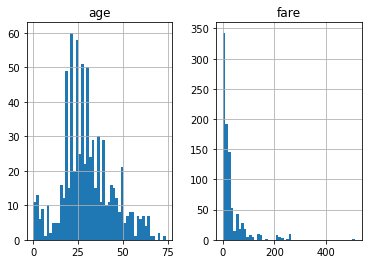

In [8]:
# exploremos la distribución de la variable 
# para seleccionar el valor arbitrario

X_train.hist(bins=50)
plt.show()

In [9]:
# En este demo vamos a usar dos valor arbitrarios para la 
# sustitución de los valores nulos
# uno al final de la distribución ==> 99
# y el otro -1, ya que la age no toma valores negativos

# first replace with 99
X_train['age_99'] = impute_na(X_train, 'age', 99)

# now replace with -1
X_train['age_minus1'] = impute_na(X_train, 'age', -1)

X_train.head(15)

,age,fare,age_99,age_minus1
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,99.0,-1.0
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,99.0,-1.0
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


Mira las files con datos ausentes (NaN) en age, y mira como esos valores fueron reemplazados ya sea por 99 o -1.

In [11]:
# vemos como la varianza cambia luego de la sustitución
# esto es de esperarse, porque el porcentaje de valores ausentes 
# es relativamente grande en age, ~20%

print('Varianza variable original: ', X_train['age'].var())
print('Varianza luego de sustitución por 99: ', X_train['age_99'].var())
print('Varianza luego de sustitución por -1: ', X_train['age_minus1'].var())


Varianza variable original:  194.16304666581863
Varianza luego de sustitución por 99:  888.7051993280913
Varianza luego de sustitución por -1:  307.94005269387753


De hecho, el efecto de la varianza es influenciado por la magnitud del valor arbitrario seleccionado para la sustitución: comparen 99 con -1.

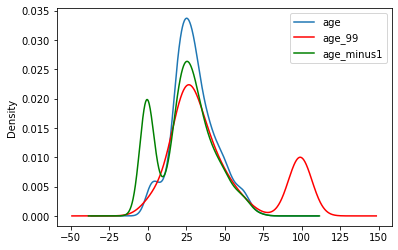

In [12]:
# Comparemos distribuciones

fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original de la variable
X_train['age'].plot(kind='kde', ax=ax)

# distribución variable sustituida con 99
X_train['age_99'].plot(kind='kde', ax=ax, color='red')

# distribución variable sustituida con -1

X_train['age_minus1'].plot(kind='kde', ax=ax, color='green')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

La sustitución por valores arbitrarios distorciona la distribución original de la variables y como es de esperarse, la variable transformada tiene mas valores alrededor del valor arbitrario seleccionado. 

**Es esto importante?**

Depende del algoritmo de machine learning seleccionado para constriuir el modelo.
Los modelos lineales asumen que las variables están normalmente distribuidas. La sustitución por valores arbitrarios puede distorcionar la distribución normal original si el porcentaje de valores ausentes es alto y por lo tanto afectar el desempeno del modelo lineal.


Por el contrario, esta técnica funciona muy bien para los algoritmos basados en árboles.


In [13]:
# esta técnica tambien puede afectar la relacíon de las variables
# con las restantes en los datos,

X_train[['fare', 'age', 'age_99', 'age_minus1']].cov()

,fare,age,age_99,age_minus1
fare,2248.326729,136.176223,-38.722001,177.733891
age,136.176223,194.163047,194.163047,194.163047
age_99,-38.722001,194.163047,888.705199,-175.265319
age_minus1,177.733891,194.163047,-175.265319,307.940053


Podemos ver que la covariance entre Age y Fare cambio después de la sustitución.

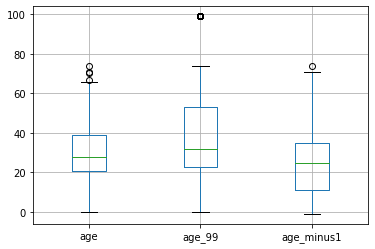

In [14]:
# Finalmente, la sustitución arbitraria tambien puede
# generar observaciones que siendo completamente normales parecen
# valores extremos

# o en otras palabras la sustitución puede incrementar
# el número percibido de valores extremos


# Gráfico de caja
X_train[['age', 'age_99', 'age_minus1']].boxplot()

De la gráfica anterior, podemos ver después de la sustitución hay mas valores extremos hacia los valores altos de Age, pero tambien para los valores inferiores.


## House Prices Dataset

Repitamos rápidamente el mismo ejercicio con el House Prices dataset; este tiene variables con pocos o bastantes valores nulos, porlo tanto podemos comparar el efecto de la sustitución en ambos escenarios.

In [15]:
# Vamos a usar las siguientes variables
# 3 de las cuales tienen valores nulos
cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [16]:
# House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [17]:
# variables con valores nulos

# en la siguiente list comprehension, iteraremos sobre las columnas
# y seleccionaremos las que contienen valores nulos

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [18]:
# porcentaje de valores nulos

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

Primero, separemos los datos en entrenamiento y prueba



In [19]:
# separemos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

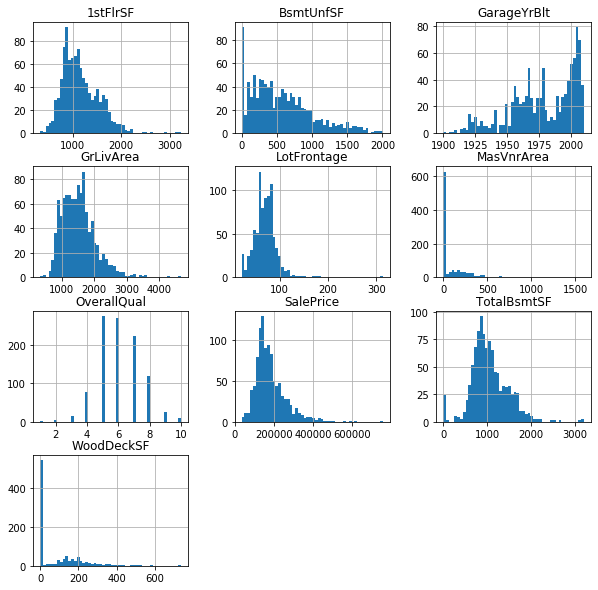

In [20]:
# distribuciones de las variables

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [29]:

# empecemos con la variable LotFrontage

# vamos a crear una nueva variable sustituyendo los valores nulos
# con el valor 999 

# en este caso 999 es seleccionado para posicionar los valores
# al extremo derecho de la distribución 
# ya que podemos ver del histograma anterior que LotFrontAge 
# toma valores de hasta 300 
X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', 999)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', 999)

In [30]:
# MasVnrArea tiene valores de hasta 1500, por lo tanto, 999 no
# funcionaría como valor para sustituir con esta variable
# usaremos 2999

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', 2999)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', 2999)

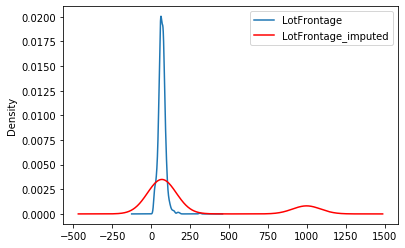

In [22]:
# evaluemos el efecto de la sustitución en las distribuciones

# Más valores se acumular hacia la mediana en la 
# distribución de LotFrontAge


fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable sustituida 
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


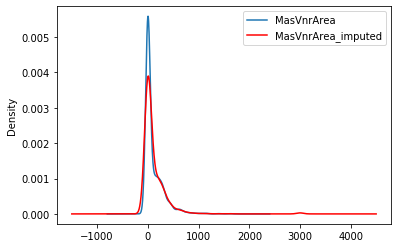

In [23]:
# Como el porcentaje de valores nulos para MasVnrArea, 
# era menor, el cambio en la distribución es menor

fig = plt.figure()
ax = fig.add_subplot(111)


# distribución original
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable sustituida con 2999
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Podemos observar de las gráficas anteriores que la distribución de LotFrontAge cambió dramáticamente, a diferencia de MasVnrArea. Esto se debe a que el % de valores nulos en la segunda variable es pequeño. Sin embargo, dependiendo del valor arbitrario seleccionado, la distribución se puede afectar más o menos.

Por qué no intentas cambiar diferetes números y comparar las distribuciones?

Finalmente, podemos ver en el demo, que el proceso de seleccionar valores arbitrarios es bastante manual. Primero, tenemos que obsevar la distribución de cada variable, identificar los valores min/max y finalmente seleccionar un valor que se acomode a cada variable para sustituir los valores nulos.  Este proceso funciona bien para algunas variables, pero si los datos contienen cientos o quiz Una alternativa para automatizar este proceso, es seleccionar los valores arbitrarios siempre al extremo de la distrubicíon, como veremos en el siguiente notebook.asas

In [24]:
# Igualmente podemos ver el efecto de la sustitución
# en la varianza

# Para LotFrontAge hay un cambio significativo ya que el porcetaje
# de valores nulos es alto~20%


print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885677
Variance after imputation:  130742.07296576205


In [25]:
# Lo mismo sucede para MasnVnrArea, a pesar que el % de valores nulos es bajo,
# el valor arbitrario seleccionado es mucho más alto, lo cual influye
# en la varianza 

print('Varianza original: ', X_train['MasVnrArea'].var())
print('Varianza despues de sustitución: ', X_train['MasVnrArea_imputed'].var())



Varianza original:  32983.53871003956
Varianza despues de sustitución:  73677.0287993238


In [28]:
# Exploremos la covarianza:
# tómate el tiempo de comparar los valores en la tabla

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,7.585010e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,-18.279174,1.140556e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,1582.711167,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-19005.620715,8.391605e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,1620.452017,2.503117e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,7485.021442,1.971276e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,9634.034363,3.694487e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,45.643154,1.588757e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,5377.154974,2.664993e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,950743.964420,7.152962e+06



**Eso es todo por este demo**.

Hacia el final de esta sección, te mostraremos como usar la sustitución arbitraria usando scikit-learn y feature engine

